In [1]:
pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

#import all necessary layers
from tensorflow.keras.layers import Input, DepthwiseConv2D
from tensorflow.keras.layers import Conv2D, BatchNormalization
from tensorflow.keras.layers import ReLU, AvgPool2D, Flatten, Dense
from tensorflow.keras import Model

In [4]:
train_ds="archive/train"
test_ds="archive/test"
validation_ds="archive/valid"

In [5]:
batch_size = 32
img_size = 224

In [6]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                             zoom_range=0.2,
                            width_shift_range=0.2,height_shift_range=0.2
                             )

val_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_ds,  
                                                target_size=(img_size, img_size), 
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical')  

validation_generator = val_datagen.flow_from_directory(validation_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

Found 3208 images belonging to 20 classes.
Found 100 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


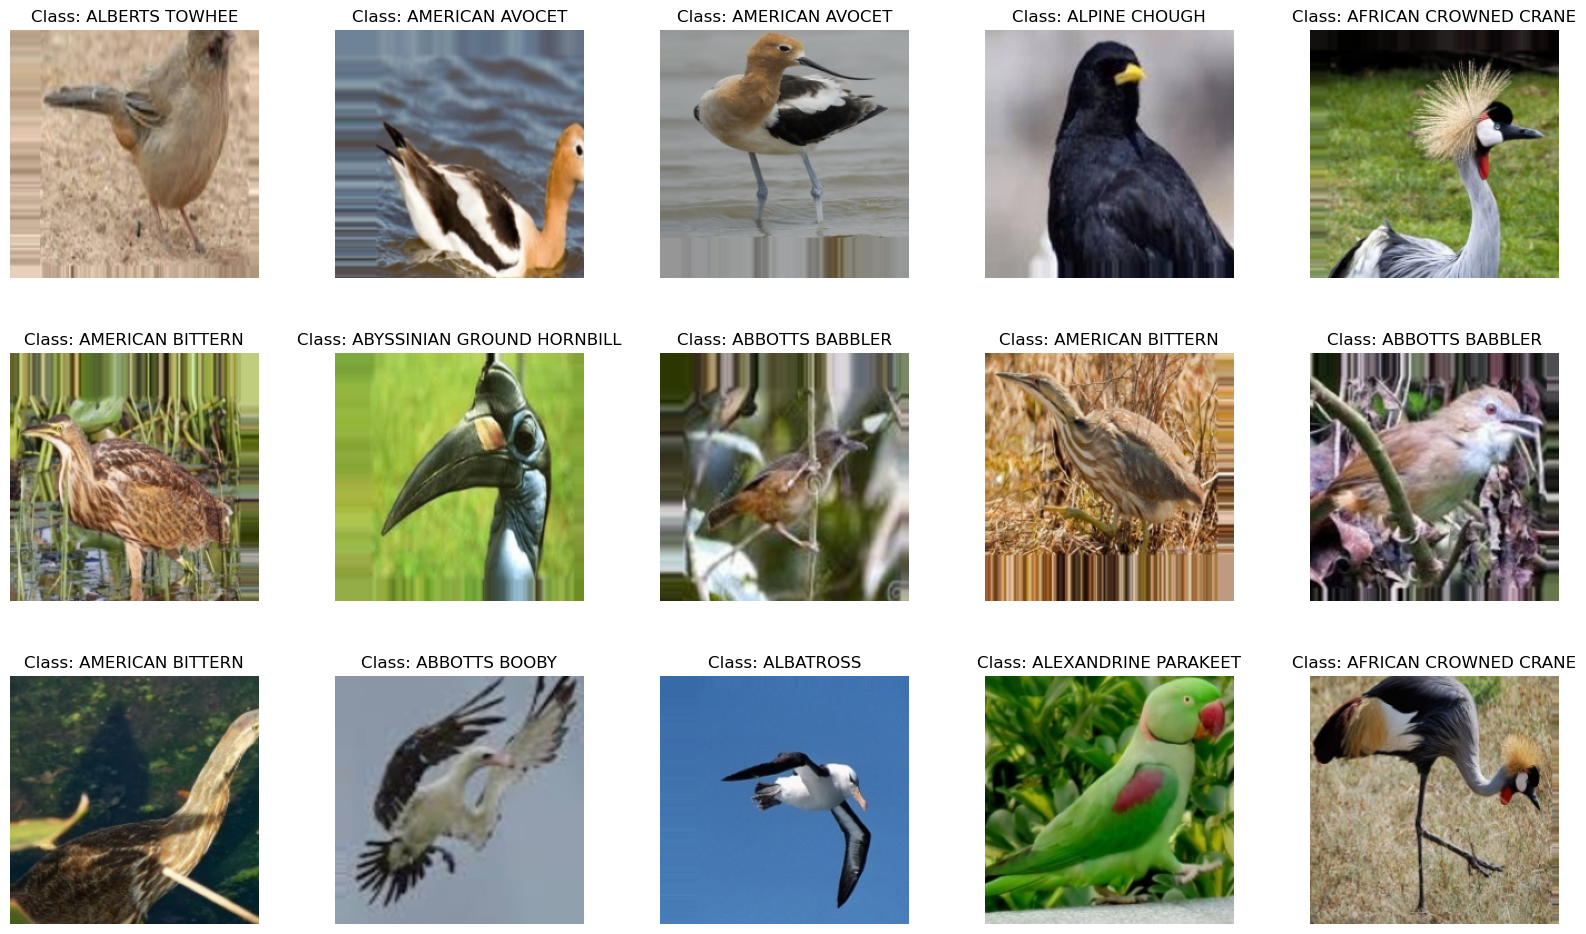

In [7]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [8]:
train_generator[0][0].shape

(32, 224, 224, 3)

In [9]:
img= train_generator[0]
print(img)

(array([[[[0.77516305, 0.6810454 , 0.5790846 ],
         [0.7766275 , 0.68250984, 0.580549  ],
         [0.7913703 , 0.69725263, 0.59529185],
         ...,
         [0.7843138 , 0.7058824 , 0.6       ],
         [0.7843138 , 0.7058824 , 0.6       ],
         [0.7843138 , 0.7058824 , 0.6       ]],

        [[0.77516305, 0.6810454 , 0.5790846 ],
         [0.7766275 , 0.68250984, 0.580549  ],
         [0.7913703 , 0.69725263, 0.59529185],
         ...,
         [0.7843138 , 0.7058824 , 0.6       ],
         [0.7843138 , 0.7058824 , 0.6       ],
         [0.7843138 , 0.7058824 , 0.6       ]],

        [[0.77516305, 0.6810454 , 0.5790846 ],
         [0.7766275 , 0.68250984, 0.580549  ],
         [0.7913703 , 0.69725263, 0.59529185],
         ...,
         [0.7843138 , 0.7058824 , 0.6       ],
         [0.7843138 , 0.7058824 , 0.6       ],
         [0.7843138 , 0.7058824 , 0.6       ]],

        ...,

        [[0.9267902 , 0.8431309 , 0.75162715],
         [0.85380435, 0.775373  , 0.6812553 

In [10]:
type(train_generator)

keras.src.legacy.preprocessing.image.DirectoryIterator

In [11]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 224, 224, 3)
(32, 20)


In [12]:
print(len(train_generator))
print(len(test_ds))
print(len(validation_ds))

101
12
13


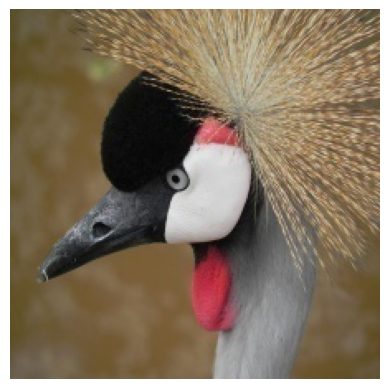

In [13]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "archive/images to predict/1.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [14]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D



In [15]:

from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

n_categories = len(os.listdir('archive/test'))# number of categories print(n_categories)
# Cargar MobileNet como base
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))  # Asegúrate de que '224, 224' coincida con tu 'img_size'

# Descongelar las últimas 20 capas
for layer in base_model.layers[:-20]:
    layer.trainable = False

# Añadir nuevas capas personalizadas
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Agrega Dropout del 50%
predictions = Dense(n_categories, activation='softmax')(x)  # Asegúrate de que 'n_categories' sea el número correcto de clases

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=predictions)


In [18]:

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Definir el decaimiento exponencial de la tasa de aprendizaje
initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

# Crear el optimizador con la nueva tasa de aprendizaje programada
optimizer = Adam(learning_rate=lr_schedule)

# Compilar el modelo con el nuevo optimizador
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])



In [19]:
history =model.fit(train_generator, validation_data=validation_generator, epochs=50)

Epoch 1/50


C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


101/101 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.3319 - loss: 2.4024 - val_accuracy: 0.8400 - val_loss: 0.5556
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.8680 - loss: 0.5076 - val_accuracy: 0.9700 - val_loss: 0.1984
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 100s 965ms/step - accuracy: 0.9261 - loss: 0.2707 - val_accuracy: 0.9700 - val_loss: 0.1119
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 94s 916ms/step - accuracy: 0.9378 - loss: 0.1988 - val_accuracy: 0.9600 - val_loss: 0.0931
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 95s 920ms/step - accuracy: 0.9586 - loss: 0.1357 - val_accuracy: 0.9600 - val_loss: 0.0845
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 90s 873ms/step - accuracy: 0.9625 - loss: 0.1278 - val_accuracy: 0.9600 - val_loss: 0.0679
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 91s 876ms/step - accuracy: 0.9755 - loss: 0.0854 - val_accuracy: 0.9800 - val_loss: 0.0627
Epoch 8/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 91s 880ms/step - accuracy: 0.9799 - loss: 0.0692 - val_ac

In [20]:
# Guardar el modelo entrenado
model.save('modelo_entrenado.h5')
model.save('modelo_entrenado.keras')


In [21]:
# Cargar el modelo guardado
from keras.models import load_model
modelo_cargado = load_model('modelo_entrenado.h5')

In [22]:
n_categories = len(os.listdir('archive/test'))# number of categories print(n_categories)

In [23]:
results =pd.DataFrame(history.history)
results.head()

,accuracy,loss,val_accuracy,val_loss
0,0.548005,1.613841,0.84,0.555553
1,0.874688,0.448651,0.97,0.198392
2,0.928616,0.260219,0.97,0.111876
3,0.947007,0.180451,0.96,0.093109
4,0.964152,0.129389,0.96,0.084511


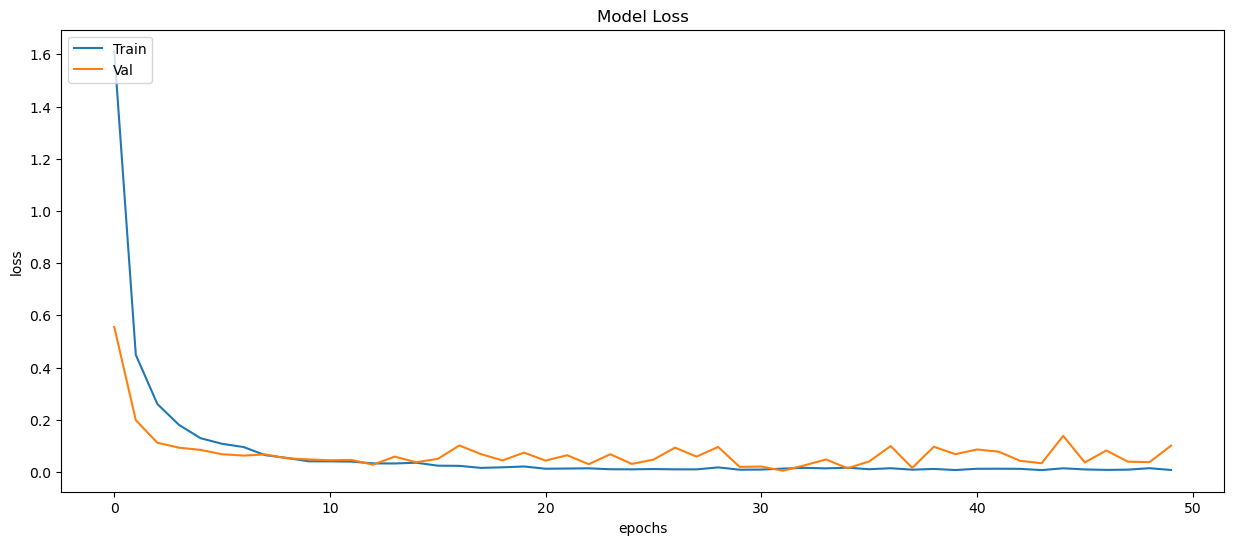

In [24]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

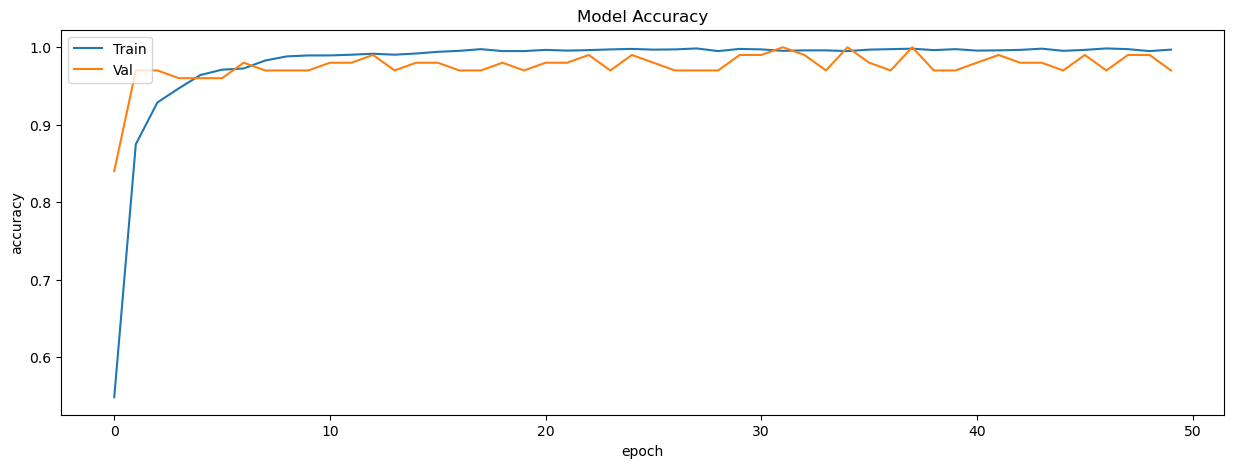

In [25]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [26]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 564ms/step


In [27]:
results =model.evaluate(test_generator)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 376ms/step - accuracy: 0.9939 - loss: 0.0155


In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1, y_pred_1))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      0.80      0.89         5
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00         5
          17       1.00    

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step


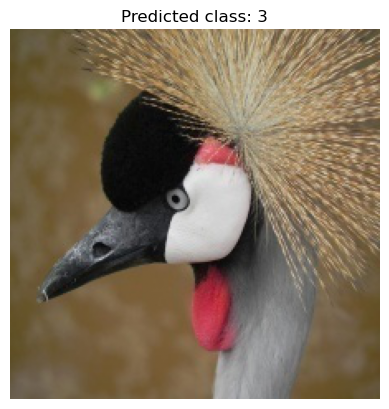

In [29]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = 'archive/images to predict'
img_size = 224

images = [] 
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()


In [30]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {labels[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : AFRICAN CROWNED CRANE
Class probability: 1.0
Predicted class for 2.jpg : AFRICAN CROWNED CRANE
Class probability: 1.0
Predicted class for 3.jpg : AFRICAN CROWNED CRANE
Class probability: 1.0
Predicted class for 4.jpg : AFRICAN CROWNED CRANE
Class probability: 1.0
Predicted class for 5.jpg : AFRICAN CROWNED CRANE
Class probability: 1.0
Predicted class for 6.jpg : ALBATROSS
Class probability: 0.6571331
Predicted class for 7.jpg : ABBOTTS BABBLER
Class probability: 0.99998856
Predicted class for 8.jpg : ALBATROSS
Class probability: 0.9999871


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 419ms/step


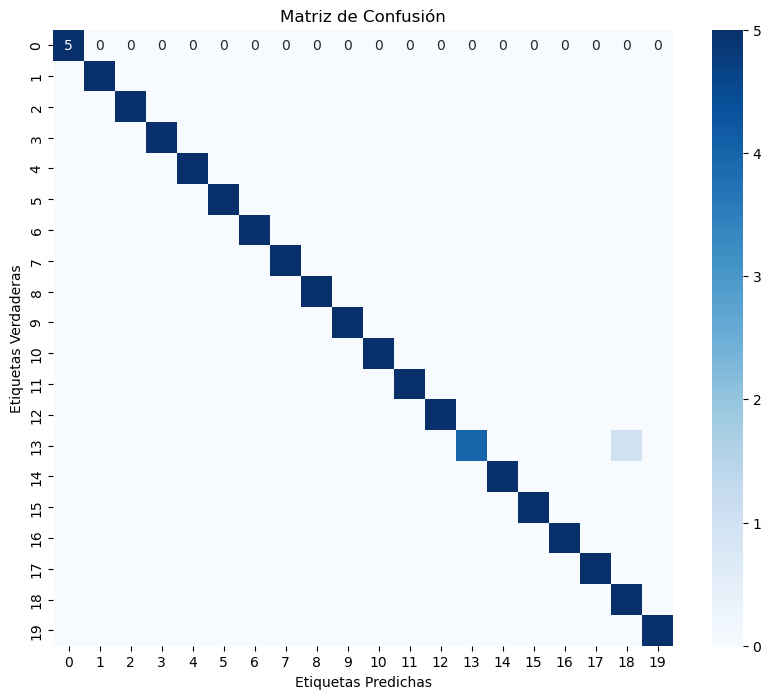

In [31]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las etiquetas reales y las predicciones
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Visualización de la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Etiquetas Verdaderas')
plt.xlabel('Etiquetas Predichas')
plt.show()
